In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.plots import add_metpy_logo
from metpy.units import units

# Load a local NetCDF file (update the path if needed)
file_path = "~/hef/met_data_test/data_0.nc"  # Change to the actual file location
dataset = xr.open_dataset(file_path)

# Inspect dataset
display(dataset)

# Select a subset of data
lats = dataset.latitude.sel(lat=slice(20, 50))  # Select latitude range
lons = dataset.lon.sel(lon=slice(230, 290))  # Select longitude range
time = dataset.time.sel(time=slice("2022-06-01", "2022-06-30"))  # Select June 2022

temp = dataset.air.sel(lat=lats, lon=lons, time=time, level=850)

# Plot mean temperature over the selected period
plt.figure(figsize=(10, 5))
plt.contourf(temp.lon, temp.lat, temp.mean(dim="time"), cmap="coolwarm")
plt.colorbar(label="Temperature (K)")
plt.title("Mean 850hPa Temperature (June 2022)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Wind barb plot (example using MetPy)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-130, -60, 20, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Sample wind data (replace with actual u/v wind components from NetCDF)
lon = [-100, -90, -80, -70]
lat = [40, 35, 30, 25]
u_wind = [5, 10, 15, 20] * units('m/s')
v_wind = [5, -5, 10, -10] * units('m/s')

ax.barbs(lon, lat, u_wind.m, v_wind.m, length=6)
plt.title("Wind Barbs Example")
plt.show()


<xarray.Dataset> Size: 18kB
Dimensions:     (valid_time: 36, latitude: 9, longitude: 13)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 288B 2013-01-01 ... 2015-12-01
  * latitude    (latitude) float64 72B 48.0 47.75 47.5 47.25 ... 46.5 46.25 46.0
  * longitude   (longitude) float64 104B 9.0 9.25 9.5 9.75 ... 11.5 11.75 12.0
    expver      (valid_time) <U4 576B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 17kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

KeyError: "'lat' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'latitude': 9})"

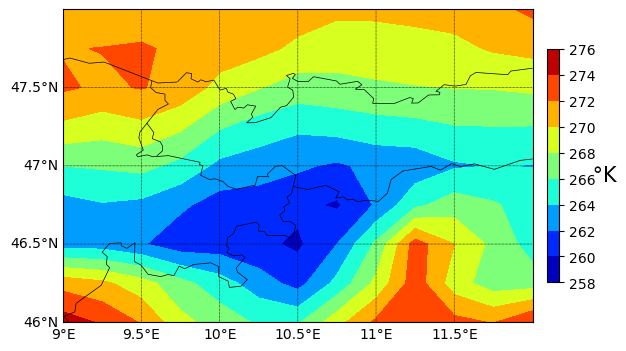

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
data = xr.open_dataset("~/hef/met_data_test/data_0.nc")

lat = data.latitude
lon = data.longitude
temp_2m = data.t2m[1,:,:]



m = Basemap(projection='cyl', llcrnrlon=9, llcrnrlat=46, urcrnrlon=12, urcrnrlat=48, resolution='i')
m.drawcountries()

parallels = np.arange(46,48,0.5)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(9,12,0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(lon, lat, temp_2m, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)

plt.show()

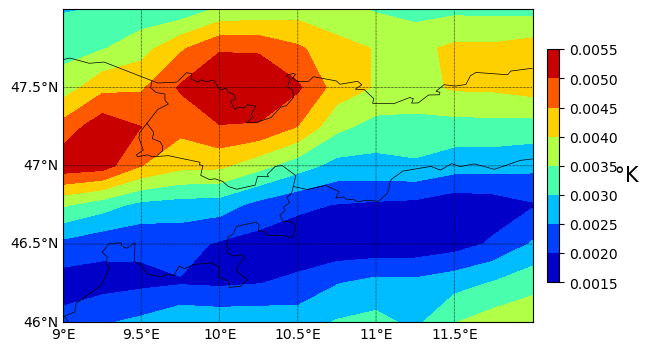

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
data = xr.open_dataset("~/hef/met_data_test/data_1.nc")

lat = data.latitude
lon = data.longitude
tp = data.tp[1,:,:]



m = Basemap(projection='cyl', llcrnrlon=9, llcrnrlat=46, urcrnrlon=12, urcrnrlat=48, resolution='i')
m.drawcountries()

parallels = np.arange(46,48,0.5)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(9,12,0.5)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(lon, lat, tp, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)

plt.show()